## 人脸识别
1. 人脸有不同的颜色组成
2. 不同的颜色由三原色：红绿蓝组成
3. 红绿蓝由0~255的数字组成

### 所以人脸是由数据组成的

### 使用matplotlib.pyplot导入数据图片并显示,观察这张图片的数据类型

In [ ]:
GridSearchCV 查找最优的条件：参数

In [ ]:
PCA降维，图片的数据比较大，维度 28*28 = 784
437*640 = 273280

## 进行人脸识别操作
1.导入相应模块工具：GridSearchCV、fetch_lfw_people、PCA、loggin等  


2.设置logging，控制台显示程序处理数据的进度  


3.使用fetch_lfw_people导入数据，如果本地没有会从网络下载，如果本地有数据，加载本地  


4.查看人脸数据结构  


5.从人脸数据中提取进行机器学习的关键数据  


6.对数据进行分割，获取训练数据和测试数据  


7.数据太复杂了，使用PCA对数据进行降维处理，去除一些不重要的数据  


8.使用GridSerchCV查询最佳的机器学习模型  


9.定义方法获取预测人名和真实人名  


10.定义方法绘制人脸识别结果图形  


11.调用方法进行数据展示  


导入相应模块工具：GridSearchCV、fetch_lfw_people、PCA、logging等 

In [1]:
from sklearn.datasets import fetch_lfw_people

from sklearn.decomposition import PCA

from sklearn.grid_search import GridSearchCV

import logging as logging

from sklearn.svm import SVC

import numpy as np

import time as time

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


设置logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')  
控制台输出记录数据，显示程序处理数据的进度

In [2]:
logging.basicConfig(level = logging.INFO,format = '%(asctime)s %(message)s')

使用fetch_lfw_people导入数据，如果本地没有会从网络下载，如果本地有数据，加载本地

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70,resize= 1,
                              slice_=(slice(0, 250, None), slice(0, 250, None)))

In [3]:
x_data = lfw_people.data
y_target = lfw_people.target
x_data.shape

(1288, 62500)

In [4]:
y_name = lfw_people.target_names
y_name

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'],
      dtype='<U17')

In [12]:
x_image = lfw_people.images
x_image.shape

(1288, 250, 250)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

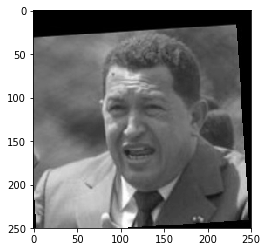

In [6]:
plt.imshow(x_data[150].reshape((250,250)),cmap = 'gray')

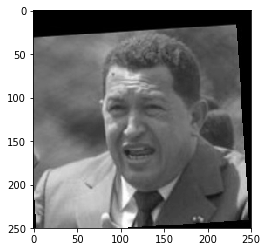

In [16]:
# plt.figure(figsize=(2,2))
plt.imshow(x_image[150],cmap = 'gray')

查看人脸数据结构

从人脸数据中提取进行机器学习的关键数据

分割训练数据和预测数据

In [7]:
#x_data,y_target
from sklearn.model_selection import train_test_split

X_train,x_test,y_train,y_test = train_test_split(x_data,y_target,test_size = 0.05)

In [8]:
X_train.shape

(1223, 62500)

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)

使用PCA进行降维

In [9]:
#whiten std标准偏差趋同
pca = PCA(n_components= 150,whiten= True,svd_solver='randomized')

In [10]:
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [11]:
X_train_pca.shape

(1223, 150)

In [12]:
svc = SVC()
print(time.time())
svc.fit(X_train_pca,y_train)
print(time.time())

1511939146.5530653
1511939147.4628181


使用GridSearchCV我们找到了最佳的支持向量机方法

In [13]:
estimator = SVC()
#If gamma is 'auto' then 1/n_features will be used instead.
#支持向量机中需要的参数
c = [0.5,1.0,2,5,10]
gamma = [0.0001,0.001,0.006,0.06,0.1,1]
param_grid = {'C' : c,'gamma':gamma}

gv = GridSearchCV(estimator,param_grid)

gv.fit(X_train_pca,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.5, 1.0, 2, 5, 10], 'gamma': [0.0001, 0.001, 0.006, 0.06, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [14]:
#选取最合适的算法
svc = gv.best_estimator_
svc

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
gv.best_score_

0.76778413736713

In [17]:
svc.fit(X_train_pca,y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

进行数据预测

In [18]:
x_test.shape

(65, 62500)

In [19]:
#将预测数据进行降维
x_test_pca = pca.transform(x_test)
x_test_pca.shape

(65, 150)

In [20]:
y_ = svc.predict(x_test_pca)
y_[:20]

array([2, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 4, 3])

In [21]:
y_test[:20]

array([2, 0, 3, 4, 3, 4, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 4, 3])

定义方法获取预测人名和真实人名 

In [22]:
y_name

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'],
      dtype='<U17')

In [23]:
def titles(y_,y_test,num):
    names = []
    for i in range(num):
        #获取预测的名字
        pre_label = y_[i]
        pre_name = y_name[pre_label]
        pre_name = pre_name.split(' ')[-1]
        
        #获取真实的名字
        true_label = y_test[i]
        true_name = y_name[true_label]
        true_name = true_name.split(' ')[-1]
        
        #添加数据到names列表中
        names.append('true:%s \n predict:%s'%(true_name,pre_name))
    return names

In [24]:
titles(y_,y_test,10)

['true:Rumsfeld \n predict:Rumsfeld',
 'true:Sharon \n predict:Powell',
 'true:Bush \n predict:Bush',
 'true:Schroeder \n predict:Bush',
 'true:Bush \n predict:Bush',
 'true:Schroeder \n predict:Bush',
 'true:Bush \n predict:Bush',
 'true:Powell \n predict:Powell',
 'true:Bush \n predict:Bush',
 'true:Bush \n predict:Bush']

调用方法获取人脸预测的名字，以及人脸的真实名字

定义方法绘制人脸识别结果图形

In [25]:
x_test.shape

(65, 62500)

In [26]:
def show_face_recognize(names,row,cols,x_test):
    plt.figure(figsize=(cols*2,row*2.8))
    
    for i in range(row*cols):
        
        axes = plt.subplot(row,cols,i+1)
        
        axes.imshow(x_test[i].reshape((250,250)),cmap = 'gray')
        
        axes.set_title(names[i])
    
        plt.axis('off')

调用方法，显示数据

In [33]:
(y_target == 3).sum()

array([False, False,  True, ..., False,  True, False], dtype=bool)

In [35]:
y_target.shape

(1288,)

In [34]:
(y_target == 3).sum()

530

In [29]:
#George W Bush == 3
y_name

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'],
      dtype='<U17')

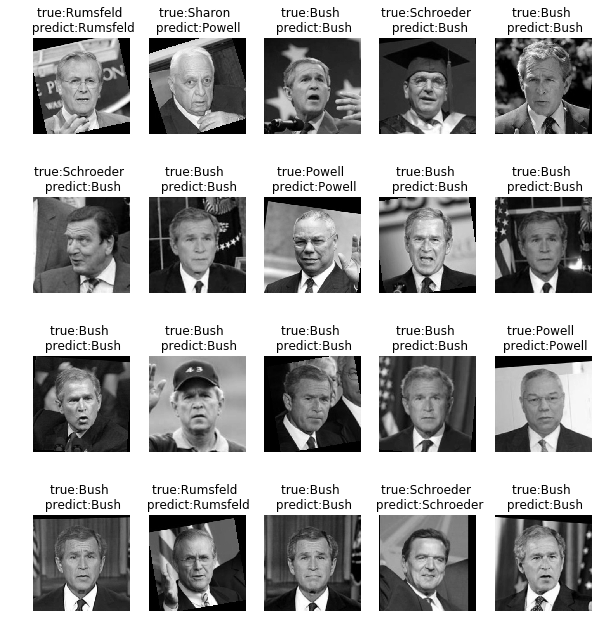

In [28]:
#4行5列
names = titles(y_,y_test,20)

show_face_recognize(names,row= 4,cols=5,x_test = x_test)

网络上查找图片使用机器学习模型进行预测

In [36]:
bush = plt.imread('./bush.jpg')
bush.shape

(500, 396, 3)

In [37]:
gray_bush = bush.mean(axis = 2)
gray_bush.shape

(500, 396)

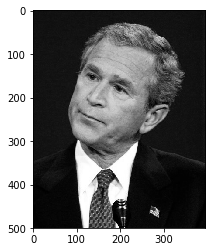

In [38]:
plt.imshow(gray_bush,cmap = 'gray')

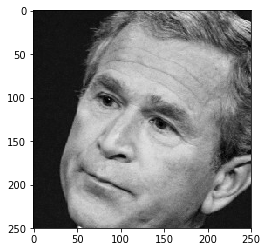

In [39]:
deal_bush = gray_bush[50:300,50:300]
plt.imshow(deal_bush,cmap = 'gray')

In [42]:
bush_pca = pca.transform(deal_bush.reshape((1,-1)))

In [43]:
svc.predict(bush_pca)

array([3])

In [44]:
y_name[3]

'George W Bush'

In [45]:
import scipy.ndimage as ndimage

(332, 500, 3)

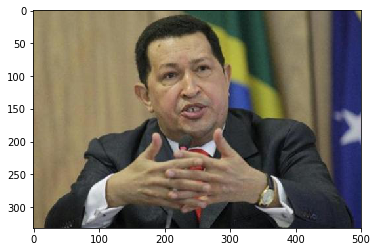

In [46]:
chavez = plt.imread('./Chavez.jpg')
plt.imshow(chavez)
chavez.shape

In [47]:
# 332,500,3

gray_chavez = chavez.mean(axis = 2)

In [53]:
gray_chavez.shape

(332, 500)

In [51]:
handle_chavez = ndimage.zoom(gray_chavez,zoom = [250/gray_chavez.shape[0],250/gray_chavez.shape[1]])

handle_chavez.shape

(250, 250)

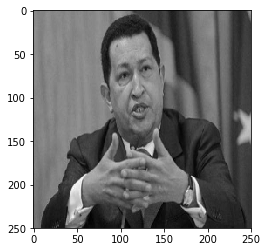

In [52]:
plt.imshow(handle_chavez,cmap = 'gray')

In [54]:
chavez = handle_chavez.reshape((1,-1))
hcavez_pca = pca.transform(chavez)

In [55]:
svc.predict(hcavez_pca)

array([3])

In [56]:
y_name

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'],
      dtype='<U17')

In [57]:
(y_target == 5).sum()

71

读取网络数据进行灰度处理gray = [0.299,0.587,0.114]  
如果是jpg图片进行归一化操作

如果图片尺寸不符合要求，那么修改尺寸